In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset
titanic = sns.load_dataset('titanic')
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
#Counting the number of columns and number of rows
titanic.shape

(891, 15)

In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Checking the number of survivors 
#0 means died and 1 means survived
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

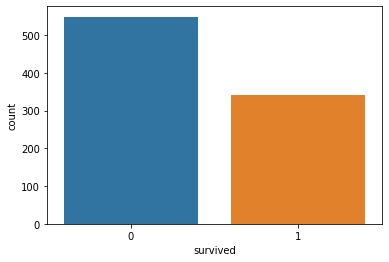

In [6]:
#Visualizing in form of graph 
sns.countplot(titanic['survived'],label="Count")

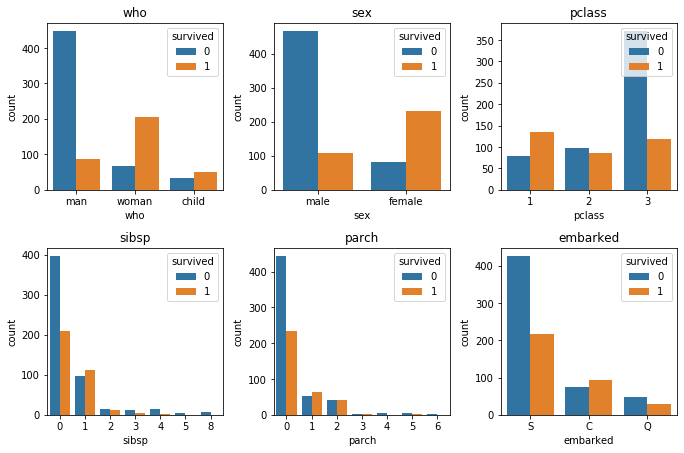

In [7]:
# Visualize the count of survivors for columns 'who', 'sex', 'pclass', 'sibsp', 'parch', and 'embarked'
cols=['who','sex','pclass','sibsp','parch','embarked']
n_rows=2
n_cols=3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(titanic[cols[i]], hue=titanic["survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right') 
        
plt.tight_layout()   #tight_layout


In [8]:
#Checking the survival rate by sex
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [9]:
#Checking hte survival rate by sex and class
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


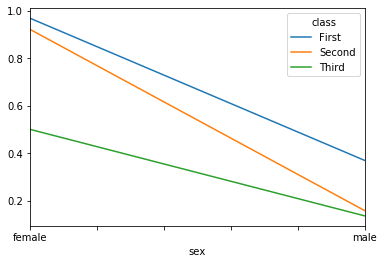

In [10]:
#Visualizing survival rate by sex and class
titanic.pivot_table('survived', index='sex', columns='class').plot()

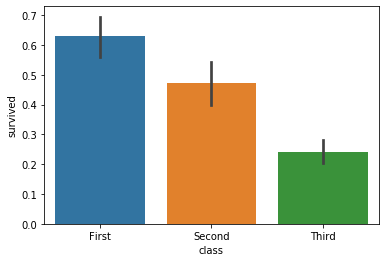

In [11]:
#Plot the survival rate of each class.
sns.barplot(x='class', y='survived', data=titanic)

In [12]:
#Looking at the survival rate by sex, age and class
age = pd.cut(titanic['age'], [0, 18, 90])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 90]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 90]  0.375000  0.071429  0.133663

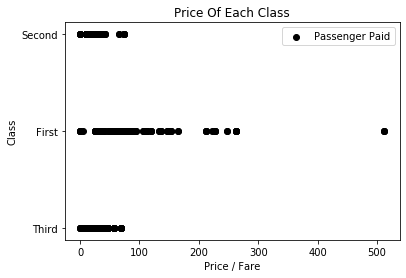

In [13]:
#Plotting the prices paid by each class
plt.scatter(titanic['fare'], titanic['class'],  color = 'black', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price Of Each Class')
plt.legend()
plt.show()

In [14]:
#Counting the empty values in each column
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
for val in titanic:
    print(titanic[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp,

In [16]:
# Drop the columns
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'alone', 'adult_male', 'who'], axis=1)

#Remove the rows with missing values
titanic = titanic.dropna(subset =['embarked', 'age'])


In [17]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
10,1,3,female,4.0,1,1,16.7000,S


In [18]:
#Counting the NEW number of rows and columns in the data set
titanic.shape

(712, 8)

In [19]:
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [20]:
#Printing the unique values of the no-numeric data in the dataset
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [21]:
#Now we will change the non-numeric data to numeric data and print the new values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode sex column
titanic.iloc[:,2]= labelencoder.fit_transform(titanic.iloc[:,2].values)

#Encode embarked
titanic.iloc[:,7]= labelencoder.fit_transform(titanic.iloc[:,7].values)

#Print the NEW unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())


[1 0]
[2 0 1]


In [22]:
#Split the data into independent 'X' and dependent 'Y' variables
X=titanic.iloc[:, 1:8].values
Y=titanic.iloc[:,0].values

In [23]:
#Splitting the dataset into 80% training data and 20% testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [24]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
#Creating functions with many machine learning models
def models(X_train,y_train):
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [26]:
#Traing all the models
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.8172690763052208
[1]K Nearest Neighbor Training Accuracy: 0.8755020080321285
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.7871485943775101
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8554216867469879
[4]Gaussian Naive Bayes Training Accuracy: 0.8012048192771084
[5]Decision Tree Classifier Training Accuracy: 0.9939759036144579
[6]Random Forest Classifier Training Accuracy: 0.9879518072289156


In [27]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test)) 
    #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()

[[105  20]
 [ 29  60]]
Model[0] Testing Accuracy = "0.7710280373831776 !"

[[102  23]
 [ 29  60]]
Model[1] Testing Accuracy = "0.7570093457943925 !"

[[103  22]
 [ 28  61]]
Model[2] Testing Accuracy = "0.7663551401869159 !"

[[104  21]
 [ 28  61]]
Model[3] Testing Accuracy = "0.7710280373831776 !"

[[98 27]
 [29 60]]
Model[4] Testing Accuracy = "0.7383177570093458 !"

[[96 29]
 [22 67]]
Model[5] Testing Accuracy = "0.7616822429906542 !"

[[106  19]
 [ 27  62]]
Model[6] Testing Accuracy = "0.7850467289719626 !"



In [28]:
#Getting the importance of functions
forest= model[6]
importances=pd.DataFrame({'feature':titanic.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
age,0.319
fare,0.273
sex,0.186
pclass,0.087
sibsp,0.057
parch,0.047
embarked,0.030


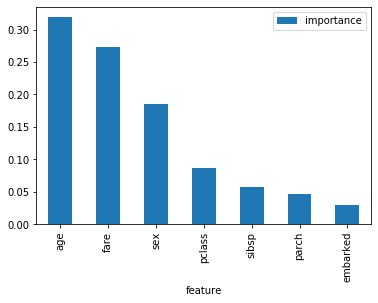

In [29]:
#Visualize the importance
importances.plot.bar()

In [30]:
#Print Prediction of Random Forest Classifier model
pred = model[6].predict(X_test)
print(pred)

#Print a space
print()

#Print the actual values
print(Y_test)

[0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1
 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1
 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0]


#Now we have analyzed the data, created our models and chosen model to predict who would have survived the titanic crash, we will now test and see if I would have survived or not

In [38]:
a=input("Enter the travelling class: ")
b=input("Enter the sex: ")  #1 for male and 0 for female
c=input("Enter the age: ")  
d=input("Enter the number of siblings/spouse aboard: ")
e=input("Enter the number of parents/chilren aboard: ")
f=input("Enter the fare: ")
g=input("Enter the port of embarkation: ")   #0 for Cherbourg 1 for Queenstown 2 for Southampton

#Checking the chances of my survival
my_survival = [[a,b,c,d,e,f,g]]
pred = model[6].predict(my_survival)
print(pred)

if pred == 0:
  print('Oh no! You did not make it')
else:
  print('Nice! You survived')

Enter the travelling class: 1
Enter the sex: 0
Enter the age: 23
Enter the number of siblings/spouse aboard: 1
Enter the number of parents/chilren aboard: 1
Enter the fare: 222
Enter the port of embarkation: 1
[0]
Oh no! You did not make it
